# Technology Stock Analysis - Apple, Google, Microsoft & Amazon (Yahoo finance)

In [1]:
#1. Importing Data Analysis Modules

import pandas as pd

from pandas import Series, DataFrame

import numpy as np


#2. Importing time Modules

from datetime import datetime


#3. Importing Data reader to read stock data

from pandas_datareader.data import DataReader

In [2]:
#4. Importing Data Visualization Modules

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('white')

%matplotlib inline

In [3]:
#5. Reading Data from Yahoo Finance

In [4]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [5]:
end = datetime.now()

start = datetime(end.year - 1, end.month, end.day)

In [6]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

Analysis:
1. What was the change in price of the stock over time? - Apple
2. What was the daily return of the stock on average? - Apple
3. What was the moving average of the various stocks? - All companies under consideration
4. What was the correlation between different stocks' closing prices? - Apple v/s Google
5. What was the correlation between different stocks' daily returns? - All companies under consideration 
6. How much value do we put at risk by investing in a particular stock? - All companies under consideration
7. How can we attempt to predict future stock behavior? - 

# Analyzing Apple Stock

In [7]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,260.558300,254.748064,257.247154,257.936996,3.340931e+07,256.539636
std,43.440813,42.291844,42.658357,43.162328,1.723024e+07,43.667464
min,193.589996,190.300003,191.550003,192.580002,1.136200e+07,190.308762
25%,218.029999,211.710007,214.839996,214.169998,2.184000e+07,212.448273
50%,263.109985,256.850006,258.690002,261.739990,2.823630e+07,260.415344
75%,300.579987,289.230011,295.059998,293.799988,3.813280e+07,293.006836
max,342.209991,332.010010,332.140015,341.200012,1.067212e+08,341.200012


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-06-10 to 2020-06-09
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


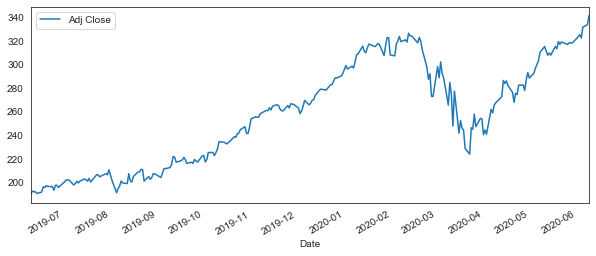

In [9]:
AAPL['Adj Close'].plot(legend = True, figsize = (10,4))

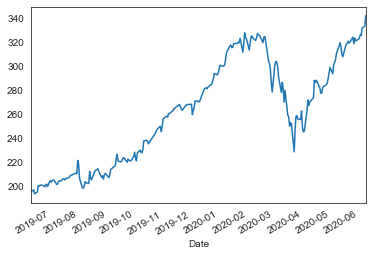

In [10]:
AAPL['High'].plot()

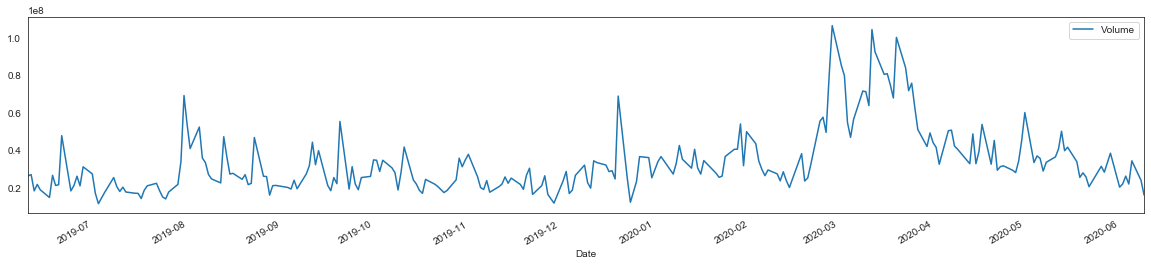

In [11]:
AAPL['Volume'].plot(legend = True, figsize = (20,4))

# 1. Moving Average - Apple

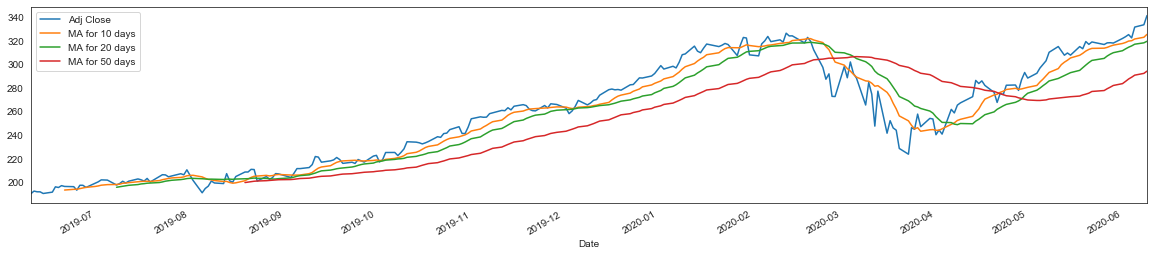

In [23]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize = (20,4))

#   

# 2. Daily return on the stocks - Apple

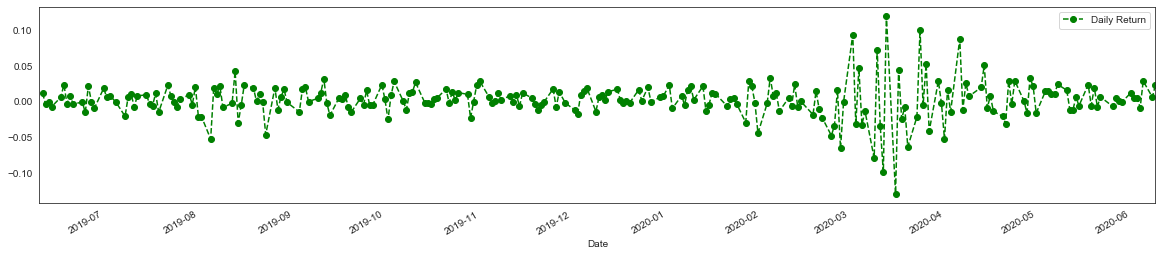

In [34]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend = True, color = 'green', figsize = (20,4), linestyle = '--', marker = 'o')

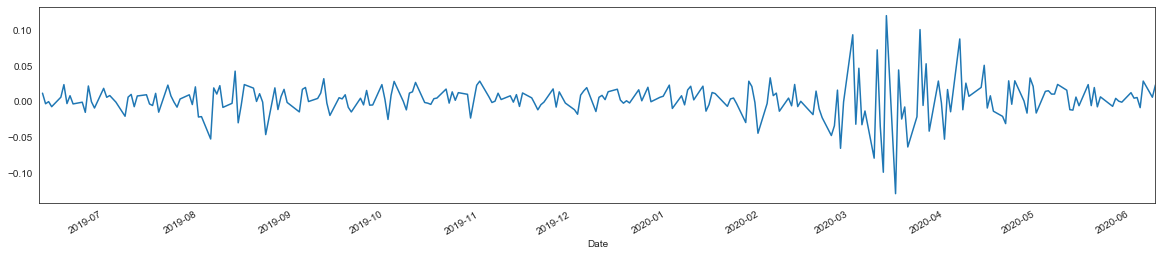

In [36]:
AAPL['Daily Return'].plot(figsize = (20,4))

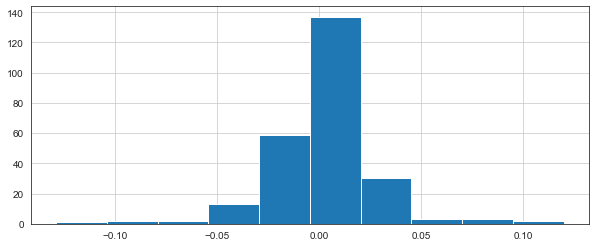

In [38]:
AAPL['Daily Return'].hist(figsize = (10,4))

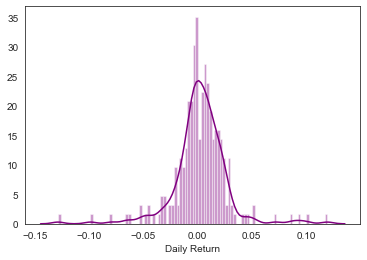

In [27]:
sns.distplot(AAPL['Daily Return'].dropna(),bins = 100, color = 'purple')

# 3. What was the moving average of the various stocks

In [28]:
returns_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

returns_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-06-10,190.308762,1080.380005,130.988159,1860.630005
2019-06-11,192.512451,1078.719971,130.494232,1863.699951
2019-06-12,191.899780,1077.030029,129.891647,1855.319946
2019-06-13,191.860229,1088.770020,130.711548,1870.300049
2019-06-14,190.466873,1085.349976,130.839981,1869.670044
...,...,...,...,...
2020-06-03,325.119995,1436.380005,185.360001,2478.399902
2020-06-04,322.320007,1412.180054,182.919998,2460.600098
2020-06-05,331.500000,1438.390015,187.199997,2483.000000


In [29]:
tech_rets  = returns_df.pct_change()

tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-06-10,NaN,NaN,NaN,NaN
2019-06-11,0.011580,-0.001537,-0.003771,0.001650
2019-06-12,-0.003183,-0.001567,-0.004618,-0.004496
2019-06-13,-0.000206,0.010900,0.006312,0.008074
2019-06-14,-0.007262,-0.003141,0.000983,-0.000337


In [39]:
# Verifying the above dataset - Drawing linear relationship between Google and Google

# (expexting: pearsons ratio of 1)

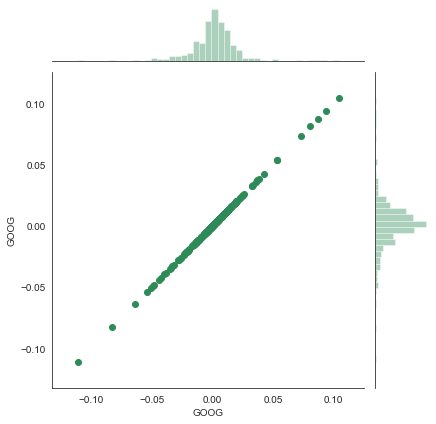

In [30]:
sns.jointplot('GOOG', 'GOOG', data = tech_rets, kind = 'scatter', color = 'seagreen')

# 4. What was the correlation between different stocks' closing prices? - Apple v/s Google

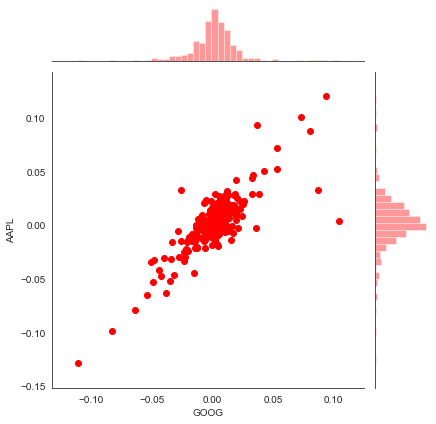

In [31]:
sns.jointplot('GOOG', 'AAPL', data = tech_rets, kind = 'scatter', color = 'red')

# from the graph we can conclude the linear relationship between AAPL and GOOG stocks are positive 

# 5. What was the correlation between different stocks' daily returns? 

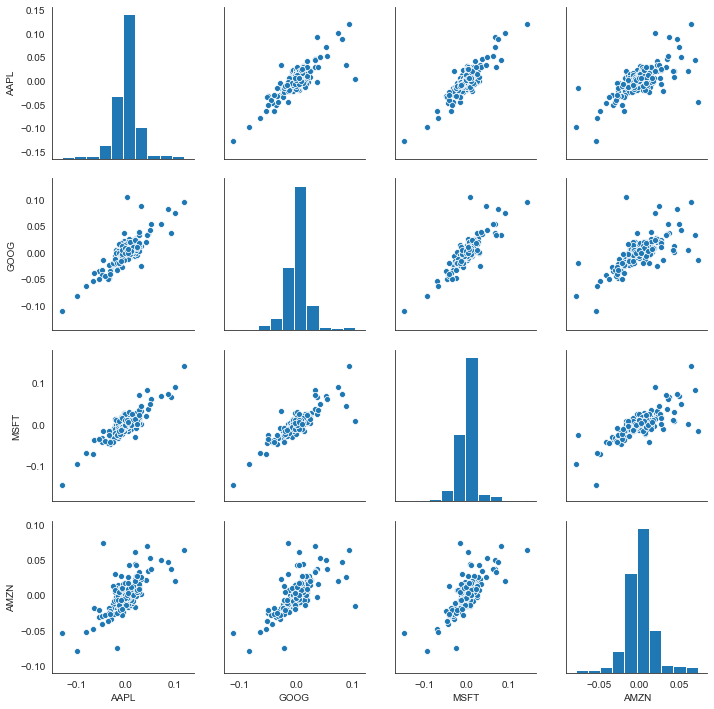

In [32]:
sns.pairplot(data = tech_rets.dropna())

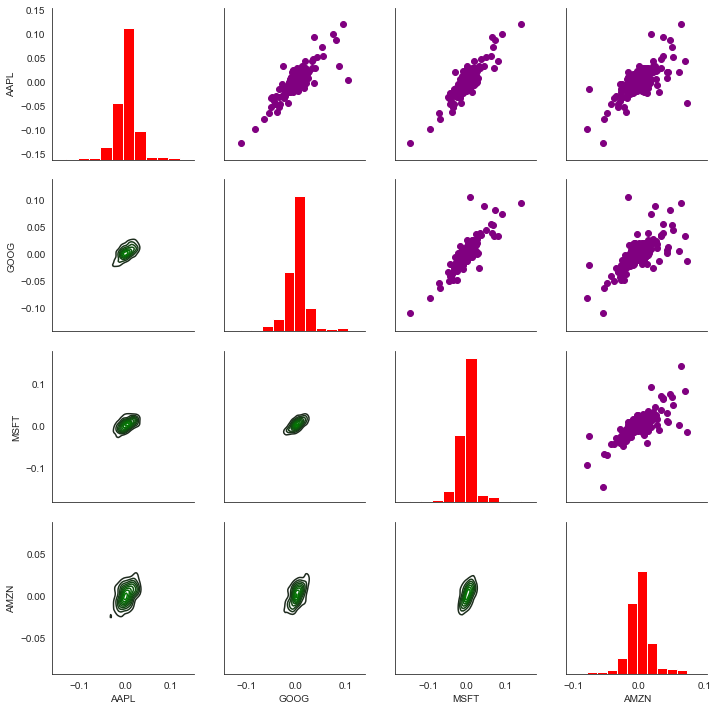

In [33]:
pairgrid = sns.PairGrid(data = tech_rets.dropna())

pairgrid.map_upper(plt.scatter,color = 'purple')

pairgrid.map_lower(sns.kdeplot, color = 'green')

pairgrid.map_diag(plt.hist, color = 'red')

# All the 4 tech companies under consideration have a positive co - relationship on their daily returns

In [40]:
closingprice_df = DataReader(tech_list, 'yahoo', start, end)['Close']

closingprice_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-06-10,192.580002,1080.380005,132.600006,1860.630005
2019-06-11,194.809998,1078.719971,132.100006,1863.699951
2019-06-12,194.190002,1077.030029,131.490005,1855.319946
2019-06-13,194.149994,1088.770020,132.320007,1870.300049
2019-06-14,192.740005,1085.349976,132.449997,1869.670044
...,...,...,...,...
2020-06-03,325.119995,1436.380005,185.360001,2478.399902
2020-06-04,322.320007,1412.180054,182.919998,2460.600098
2020-06-05,331.500000,1438.390015,187.199997,2483.000000


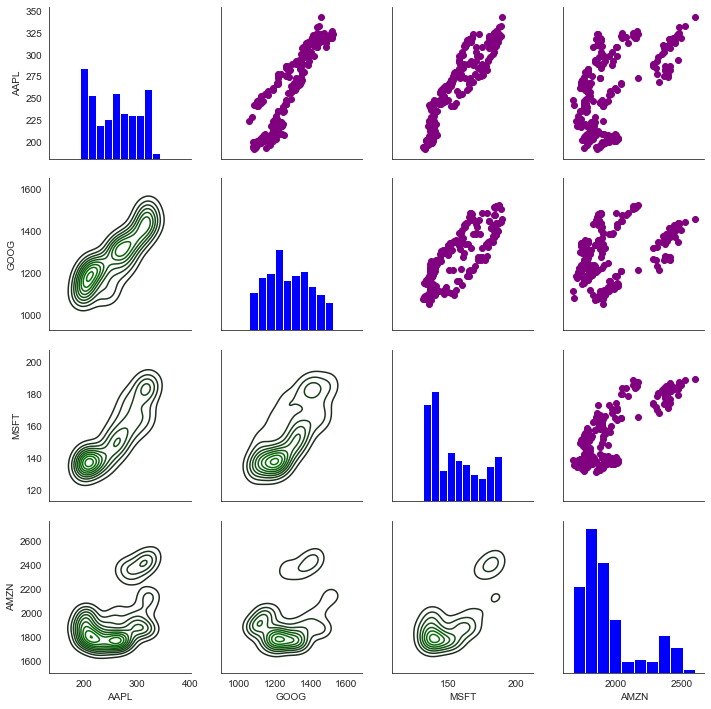

In [41]:
closing_price = sns.PairGrid(data = closingprice_df. dropna())

closing_price.map_upper(plt.scatter, color = 'purple')

closing_price.map_lower(sns.kdeplot, color = 'green')

closing_price.map_diag(plt.hist, color = 'blue')

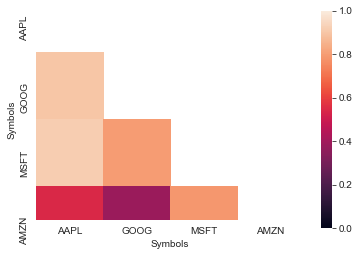

In [42]:
corr = closingprice_df.corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask, vmin = 0, vmax = 1, square = True)

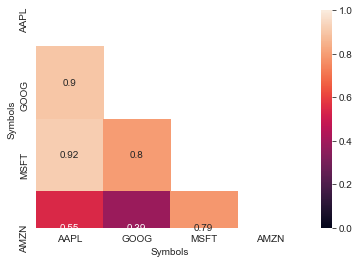

In [43]:
corr_tech_rets = tech_rets.corr()

mask = np.zeros_like(corr, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmin=0, vmax=1,annot=True)

# All the 4 tech companies under consideration have a positive co - relationship on their closing prices

# 6. How much value do we put at risk by investing in a particular stock?

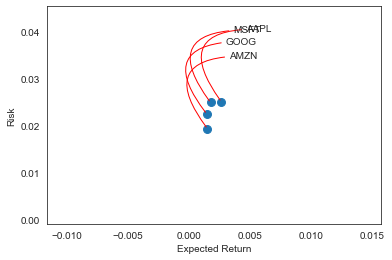

In [55]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.scatter(x = rets.mean(), y = rets.std(), s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns, rets.mean(),rets.std()):
    plt.annotate(
        label,xy = (x, y), xytext = (50, 70),
        textcoords = 'offset points', ha = 'right', va = 'baseline',
        arrowprops = dict(arrowstyle = '-', connectionstyle = ('arc3, rad = 1'), color = 'red'))
        
        

# AAPL having the highest return value 

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


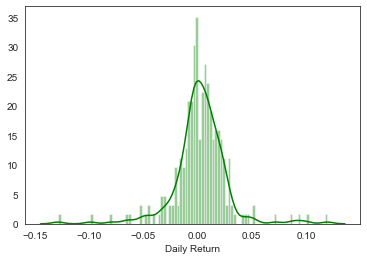

In [45]:
sns.distplot(AAPL['Daily Return'], bins = 100, color = 'green')

In [57]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-06-11,0.011580,-0.001537,-0.003771,0.001650
2019-06-12,-0.003183,-0.001567,-0.004618,-0.004496
2019-06-13,-0.000206,0.010900,0.006312,0.008074
2019-06-14,-0.007262,-0.003141,0.000983,-0.000337
2019-06-17,0.005967,0.006588,0.003020,0.008750


In [58]:
# Risk Analysis - Method 1 (Bootstrap method - Quantile)

rets['AAPL'].quantile(.05)

-0.03308284476401163

# with 95% confidence we will lose a max of 3.3% on AAPL Stocks

# 7. How can we attempt to predict future stock behavior? 

In [59]:
# Risk Analysis - Method 2 (Monte Carlo method)

days = 365

dt = 1/days

mu = rets['GOOG'].mean()

sigma = rets['GOOG'].std()


In [60]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x - 1] + (price[x - 1] * (drift[x] + shock[x]))
    
    return price
    

In [61]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-10,1092.660034,1072.322021,1072.979980,1080.380005,1464200,1080.380005
2019-06-11,1101.989990,1077.603027,1093.979980,1078.719971,1436700,1078.719971
2019-06-12,1080.930054,1067.540039,1078.000000,1077.030029,1061000,1077.030029
2019-06-13,1094.170044,1080.150024,1083.640015,1088.770020,1057700,1088.770020
2019-06-14,1092.689941,1080.171997,1086.420044,1085.349976,1111500,1085.349976


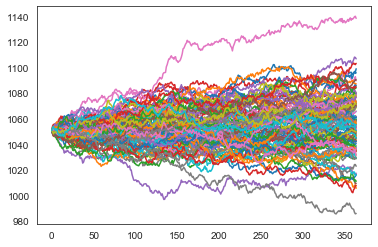

In [62]:
start_price = 1050.630005

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

In [63]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for google stock after 365 days')

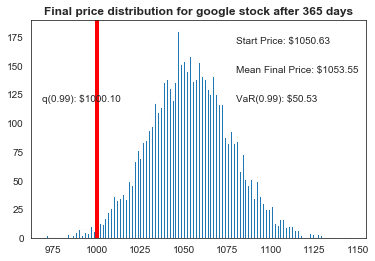

In [66]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins = 200)

# Starting price 
plt.figtext(0.6, 0.8, s = 'Start Price: $%.2f' %start_price)

# Mean ending price
plt.figtext(0.6, 0.7,'Mean Final Price: $%.2f' %simulations.mean())

# Variance of the price (within 99% of the confidence interval)
plt.figtext(0.6, 0.6,'VaR(0.99): $%.2f' %(start_price - q))

# Display 1% quantile
plt.figtext(0.15, 0.6,'q(0.99): $%.2f' %q)

# Plot a line at 1% quantile result
plt.axvline(x = q, linewidth = 4, color = 'red')

# Title

plt.title('Final price distribution for google stock after {} days'.format(days), weight = 'bold')


# with 99% confidence we will lose a max of $50.53 on GOOG Stocks